In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

suffix = '-6H1d'
errors1 = np.loadtxt('save/errors1' + suffix + '.txt')
errors = np.loadtxt('save/errors' + suffix + '.txt')
Ns = np.loadtxt('save/Ns' + suffix + '.txt')
rcosts = np.loadtxt('save/rcosts' + suffix + '.txt')
tcosts = np.loadtxt('save/tcosts' + suffix + '.txt')

msize = 4

ro, bo = 'ro', 'bo'

# 1d 4 Qubit Heisenberg with 16k iterations, M=200 averages

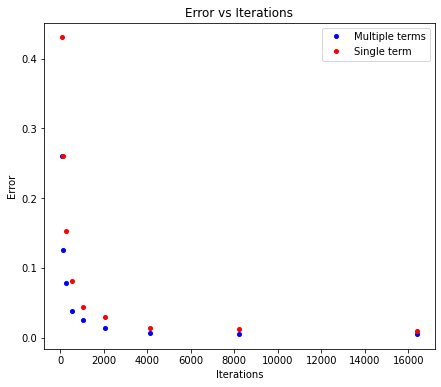

In [2]:
plt.figure(figsize=(7,6))
plt.title('Error vs Iterations')
plt.plot(Ns, errors, bo, label='Multiple terms', markersize=msize)
plt.plot(Ns, errors1, ro, label='Single term', markersize=msize)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.show()

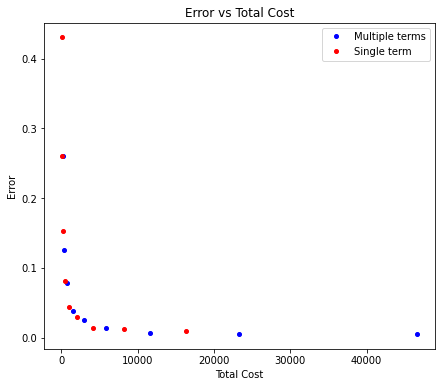

In [3]:
plt.figure(figsize=(7,6))
plt.title('Error vs Total Cost')
plt.plot(tcosts, errors, bo, label='Multiple terms', markersize=msize)
plt.plot(Ns, errors1, ro, label='Single term', markersize=msize)
plt.xlabel('Total Cost')
plt.ylabel('Error')
plt.legend()
plt.show()

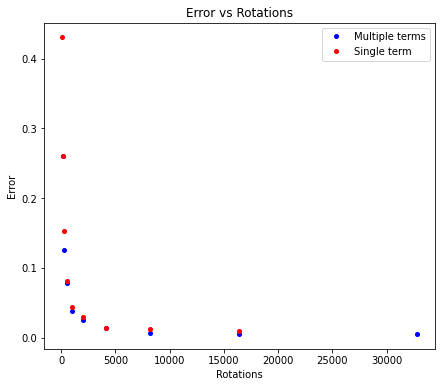

In [4]:
plt.figure(figsize=(7,6))
plt.title('Error vs Rotations')
plt.plot(rcosts, errors, bo, label='Multiple terms', markersize=msize)
plt.plot(Ns, errors1, ro, label='Single term', markersize=msize)
plt.xlabel('Rotations')
plt.ylabel('Error')
plt.legend()
plt.show()

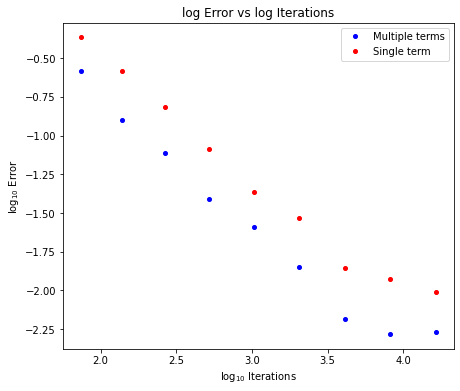

In [5]:
plt.figure(figsize=(7,6))
plt.title('log Error vs log Iterations')
plt.plot(np.log10(Ns), np.log10(errors), bo, label='Multiple terms', markersize=msize)
plt.plot(np.log10(Ns), np.log10(errors1), ro, label='Single term', markersize=msize)
plt.xlabel(r'log$_{10}$ Iterations')
plt.ylabel(r'log$_{10}$ Error')
plt.legend()
plt.show()

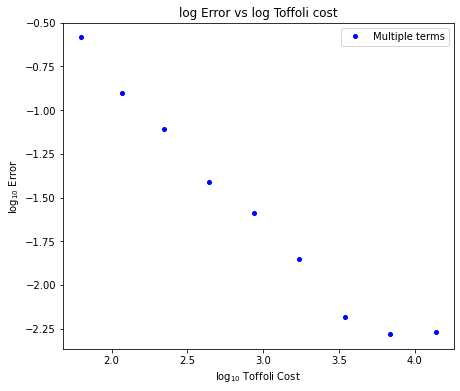

In [6]:
toffcost = tcosts - rcosts

plt.figure(figsize=(7,6))
plt.title('log Error vs log Toffoli cost')
plt.plot(np.log10(toffcost), np.log10(errors), bo, label='Multiple terms', markersize=msize)
plt.xlabel(r'log$_{10}$ Toffoli Cost')
plt.ylabel(r'log$_{10}$ Error')
plt.legend()
plt.show()

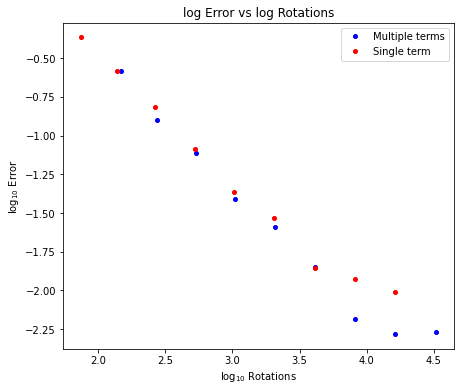

In [7]:
plt.figure(figsize=(7,6))
plt.title('log Error vs log Rotations')
plt.plot(np.log10(rcosts), np.log10(errors), bo, label='Multiple terms', markersize=msize)
plt.plot(np.log10(Ns), np.log10(errors1), ro, label='Single term', markersize=msize)
plt.xlabel(r'log$_{10}$ Rotations')
plt.ylabel(r'log$_{10}$ Error')
plt.legend()
plt.show()

In [8]:
def interpolated_value(x, x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1)
    b = y1 - m*x1
    return m*x+b

def interpolated_average_ratio(xs, ys, x1s, y1s):
    n = len(xs)
    ratios = []
    for idx, x in enumerate(xs):
        if idx != n-1:
            x11, x12 = x1s[idx], x1s[idx+1] 
            y11, y12 = y1s[idx], y1s[idx+1] 
        else:
            x11, x12 = x1s[idx-1], x1s[idx] 
            y11, y12 = y1s[idx-1], y1s[idx]
        y_prime = interpolated_value(x, x11, y11, x12, y12)
        ratios.append(np.exp(y_prime - ys[idx]))
    return np.mean(ratios), ratios

def average_ratio(xs, ys, y1s):
    ratios = []
    for idx, x in enumerate(xs):
        ratios.append(np.exp(y1s[idx]-ys[idx]))
    return np.mean(ratios), ratios

In [9]:
rotations_ratio, rrs = interpolated_average_ratio(np.log10(rcosts), np.log10(errors),
                                np.log10(Ns), np.log10(errors1))
iterations_ratio, ris = average_ratio(np.log10(Ns), np.log10(errors), np.log10(errors1))

print("Average ratio for log Error vs Log Rotations =  {0:.4f}".format(rotations_ratio))
print("Average ratio for log Error vs Log Iterations =  {0:.4f}".format(iterations_ratio))

Average ratio for log Error vs Log Rotations =  1.1055
Average ratio for log Error vs Log Iterations =  1.3408


In [10]:
print(["{0:0.4f}".format(i) for i in rrs])
print(["{0:0.4f}".format(i) for i in ris])

['0.9750', '1.0711', '1.0148', '1.0448', '1.0568', '0.9912', '1.2914', '1.3108', '1.1933']
['1.2435', '1.3694', '1.3388', '1.3828', '1.2550', '1.3719', '1.3839', '1.4250', '1.2973']
